<a href="https://colab.research.google.com/github/rimjhimkhanna09/AIML-Advance-/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 6: K-Nearest Neighbors (KNN) Classification

✅ Step-by-Step Implementation: KNN Classification

🔧 Step 0: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap


📥 Step 1: Load the Dataset

In [2]:
# Load the Iris dataset
df = pd.read_csv('/content/Iris.csv')

# Display the first few rows
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


🔍 Step 2: Preprocess the Data

In [3]:
# Drop 'Id' column if it exists
df.drop('Id', axis=1, inplace=True)

# Features and target
X = df.iloc[:, :-1].values  # All rows, all columns except the last
y = df.iloc[:, -1].values   # Last column (Species)

# Encode categorical labels (optional for KNN, as it can handle strings)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)  # Converts species names to 0, 1, 2


📊 Step 3: Normalize the Features

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


✂️ Step 4: Split the Dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)


🤖 Step 5: Train and Test KNN with Different K Values

In [6]:
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.2f}")


K=1, Accuracy=0.93
K=2, Accuracy=0.89
K=3, Accuracy=0.91
K=4, Accuracy=0.91
K=5, Accuracy=0.91
K=6, Accuracy=0.91
K=7, Accuracy=0.93
K=8, Accuracy=0.89
K=9, Accuracy=0.96
K=10, Accuracy=0.93


📈 Step 6: Plot Accuracy vs K

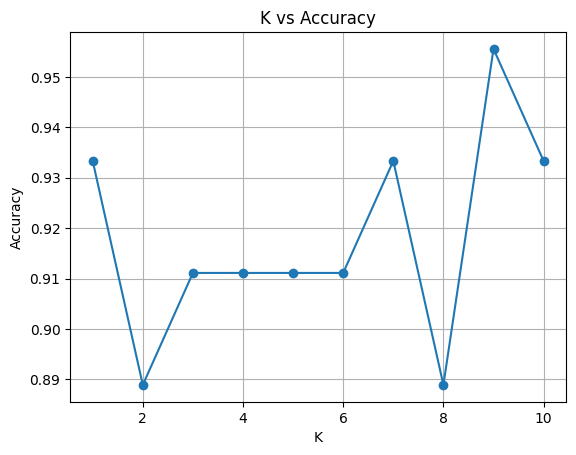

In [7]:
plt.plot(k_values, accuracies, marker='o')
plt.title('K vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


📌 Step 7: Confusion Matrix for Best K

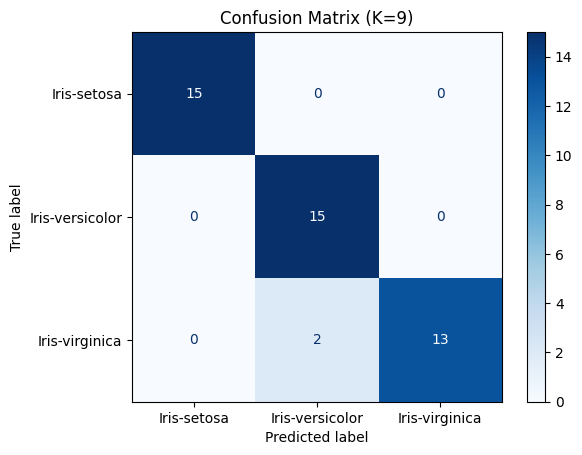

In [8]:
best_k = k_values[np.argmax(accuracies)]
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (K={best_k})')
plt.show()


🎨 Step 8: Visualize Decision Boundaries (Using 2 Features)

To visualize decision boundaries, let's use only 2 features (e.g., sepal length and width):

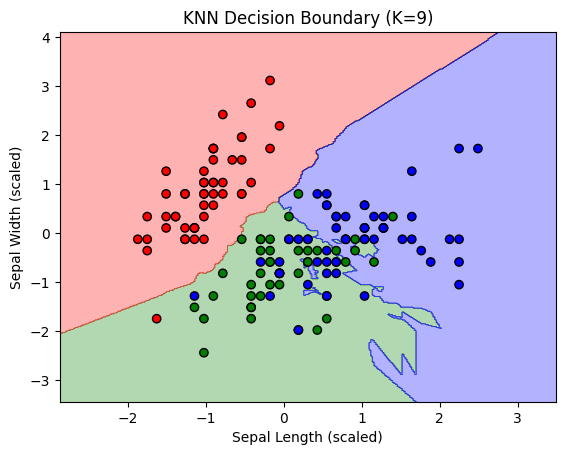

In [9]:
# Select only 2 features for visualization
X_vis = X_scaled[:, :2]  # sepal length and sepal width
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.3, random_state=42, stratify=y)

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

# Plot decision boundary
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'green', 'blue']))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['red', 'green', 'blue']))
plt.title(f"KNN Decision Boundary (K={best_k})")
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.show()
